In [1]:
import pyspark
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit, column
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import *

In [ ]:
# creating the spark session
spark = SparkSession.builder.appName('Introduction').getOrCreate()

In [3]:
# looking at the spark session details:
spark

In [11]:
data = spark.read.csv('test1.csv', header=True)
# header=True is to use the first row as the header

In [18]:
# checking the type of data:
type(data)

pyspark.sql.dataframe.DataFrame

In [12]:
data.show()

+-----+---+----------+
| name|age|experience|
+-----+---+----------+
| adam| 25|         3|
|harry| 40|        15|
| john| 30|         9|
+-----+---+----------+



In [14]:
# checking the data types of columns:
data.dtypes

[('name', 'string'), ('age', 'string'), ('experience', 'string')]

In [15]:
# as we see the default way in which spark loads the data is strings, to get the correct datatypes we use inferschema 

In [16]:
data = spark.read.csv('test1.csv', inferSchema=True, header=True)

In [21]:
# list of the columns in the dataframe:
data.columns

['name', 'age', 'experience']

In [17]:
# looking at the dtypes of columns:
data.dtypes

[('name', 'string'), ('age', 'int'), ('experience', 'int')]

In [20]:
# having a look at the schema of the dataframe:
data.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- experience: integer (nullable = true)



In [30]:
# Selecting a columns:
data_name = data.select('name')
print(data_name)

DataFrame[name: string]


In [31]:
data_name.show()

+-----+
| name|
+-----+
| adam|
|harry|
| john|
+-----+



In [27]:
# Selecting multiple columns:
data.select(['name', 'experience']).show()

+-----+----------+
| name|experience|
+-----+----------+
| adam|         3|
|harry|        15|
| john|         9|
+-----+----------+



In [32]:
# looking at the decsription of the data:
data.describe().show()

+-------+----+------------------+----------+
|summary|name|               age|experience|
+-------+----+------------------+----------+
|  count|   3|                 3|         3|
|   mean|null|31.666666666666668|       9.0|
| stddev|null| 7.637626158259733|       6.0|
|    min|adam|                25|         3|
|    max|john|                40|        15|
+-------+----+------------------+----------+



In [45]:
## Adding columns in the dataframe from existing column:
temp = data.withColumn('Working Since', data['age'] - data['experience'])

In [46]:
temp.show()

+-----+---+----------+-------------+
| name|age|experience|Working Since|
+-----+---+----------+-------------+
| adam| 25|         3|           22|
|harry| 40|        15|           25|
| john| 30|         9|           21|
+-----+---+----------+-------------+



In [49]:
## Dropping columns from the dataframe:
temp = temp.drop('Working Since')

In [50]:
temp.show()

+-----+---+----------+
| name|age|experience|
+-----+---+----------+
| adam| 25|         3|
|harry| 40|        15|
| john| 30|         9|
+-----+---+----------+



In [52]:
## Renaming the columns:
data = data.withColumnRenamed('name', 'first name')
data.show()

+----------+---+----------+
|first name|age|experience|
+----------+---+----------+
|      adam| 25|         3|
|     harry| 40|        15|
|      john| 30|         9|
+----------+---+----------+



In [8]:
df = spark.read.csv("test2.csv", inferSchema=True, header=True)

In [45]:
# number of records:
df.count()

7

In [9]:
# schema of the data:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- experience: integer (nullable = true)
 |-- salary: integer (nullable = true)



In [11]:
# another way to look at the data types
df.dtypes

[('name', 'string'), ('age', 'int'), ('experience', 'int'), ('salary', 'int')]

In [12]:
# looking at the columns in the dataframe
df.columns

['name', 'age', 'experience', 'salary']

In [13]:
df.show()

+-----+----+----------+------+
| name| age|experience|salary|
+-----+----+----------+------+
|kaden|  35|        10| 35000|
| adam|  25|         4| 15000|
|James|null|        13| 45000|
| Andy|  45|        17| 50000|
|  Sid|  32|      null| 25000|
| Kyle|  28|         7| 25000|
| Dave|null|         3| 12500|
+-----+----+----------+------+



In [14]:
# dropping rows with null values:
df.na.drop().show()

+-----+---+----------+------+
| name|age|experience|salary|
+-----+---+----------+------+
|kaden| 35|        10| 35000|
| adam| 25|         4| 15000|
| Andy| 45|        17| 50000|
| Kyle| 28|         7| 25000|
+-----+---+----------+------+



In [15]:
# looking at the how parameter of the drop function:

df.na.drop(how='any').show()  # this will drop a row if any of the value is null
df.na.drop(how='all').show()  # this will drop a row only if all the values in the row are null.

+-----+---+----------+------+
| name|age|experience|salary|
+-----+---+----------+------+
|kaden| 35|        10| 35000|
| adam| 25|         4| 15000|
| Andy| 45|        17| 50000|
| Kyle| 28|         7| 25000|
+-----+---+----------+------+

+-----+----+----------+------+
| name| age|experience|salary|
+-----+----+----------+------+
|kaden|  35|        10| 35000|
| adam|  25|         4| 15000|
|James|null|        13| 45000|
| Andy|  45|        17| 50000|
|  Sid|  32|      null| 25000|
| Kyle|  28|         7| 25000|
| Dave|null|         3| 12500|
+-----+----+----------+------+



In [37]:
# Imputing Missing values:
impute = Imputer(inputCols=['age','experience'],
                outputCols=[f"{x}_imputed" for x in ['age', 'experience']]).setStrategy('mean')

In [39]:
# applying fit transform to the df
impute.fit(df).transform(df).show()

+-----+----+----------+------+-----------+------------------+
| name| age|experience|salary|age_imputed|experience_imputed|
+-----+----+----------+------+-----------+------------------+
|kaden|  35|        10| 35000|         35|                10|
| adam|  25|         4| 15000|         25|                 4|
|James|null|        13| 45000|         33|                13|
| Andy|  45|        17| 50000|         45|                17|
|  Sid|  32|      null| 25000|         32|                 9|
| Kyle|  28|         7| 25000|         28|                 7|
| Dave|null|         3| 12500|         33|                 3|
+-----+----+----------+------+-----------+------------------+



In [47]:
# Filters in pySpark:

df.filter("salary>30000").show()

+-----+----+----------+------+
| name| age|experience|salary|
+-----+----+----------+------+
|kaden|  35|        10| 35000|
|James|null|        13| 45000|
| Andy|  45|        17| 50000|
+-----+----+----------+------+



In [49]:
df.filter(df['salary'] >= 30000).select(['name', 'experience']).show()

+-----+----------+
| name|experience|
+-----+----------+
|kaden|        10|
|James|        13|
| Andy|        17|
+-----+----------+



In [54]:
# not operator:
df.filter(~(df['salary'] >= 30000)).select(['name', 'experience']).show()

+----+----------+
|name|experience|
+----+----------+
|adam|         4|
| Sid|      null|
|Kyle|         7|
|Dave|         3|
+----+----------+



In [55]:
# Multiple Filters using or(|) and and(&):
df.filter((df['salary'] > 30000) & (df['experience'] >= 13)).show()

+-----+----+----------+------+
| name| age|experience|salary|
+-----+----+----------+------+
|James|null|        13| 45000|
| Andy|  45|        17| 50000|
+-----+----+----------+------+



In [56]:
df.filter((df['salary'] >= 45000) | (df['salary'] <= 20000)).show()

+-----+----+----------+------+
| name| age|experience|salary|
+-----+----+----------+------+
| adam|  25|         4| 15000|
|James|null|        13| 45000|
| Andy|  45|        17| 50000|
| Dave|null|         3| 12500|
+-----+----+----------+------+



In [57]:
# Groupby and Aggregation Functions:

In [60]:
df = spark.read.csv('test3.csv', header=True, inferSchema=True)

In [61]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: integer (nullable = true)



In [62]:
df.show()

+-------+-----------+------+
|   name| department|salary|
+-------+-----------+------+
|   john|datascience| 10000|
|   john|        iot|  5000|
|   mark|    bigdata|  4000|
|   john|    bigdata|  3000|
|   mark|datascience|  8000|
|  shawn|datascience| 15000|
|  shawn|        iot|  3500|
|  shawn|    bigdata|  7000|
|dorothy|datascience|  6500|
|dorothy|    bigdata|  4500|
+-------+-----------+------+



In [67]:
# Groupby
df.groupBy('Name').sum().show()

+-------+-----------+
|   Name|sum(salary)|
+-------+-----------+
|  shawn|      25500|
|dorothy|      11000|
|   john|      18000|
|   mark|      12000|
+-------+-----------+



In [72]:
# mean salary of each department
df.groupBy('department').mean().show()

+-----------+-----------+
| department|avg(salary)|
+-----------+-----------+
|        iot|     4250.0|
|    bigdata|     4625.0|
|datascience|     9875.0|
+-----------+-----------+



In [73]:
# number of employees in each department
df.groupBy('department').count().show()

+-----------+-----+
| department|count|
+-----------+-----+
|        iot|    2|
|    bigdata|    4|
|datascience|    4|
+-----------+-----+



In [74]:
# Aggregation:
df.agg({'salary': 'sum'}).show()

+-----------+
|sum(salary)|
+-----------+
|      66500|
+-----------+



In [81]:
# finding person with highest salary:
df.groupBy('name').sum().agg({'name': 'max'}).show()

+---------+
|max(name)|
+---------+
|    shawn|
+---------+



# Data Science With Pyspark

### Basics:

In [15]:
# loading the data from the file:
file_location = "movie_data_part1.csv"
file_type = "csv"

In [16]:
# loading the data:
df = spark.read.csv(file_location,
                   header=True,
                   inferSchema=False,
                   sep="|")

In [17]:
# Reading the metadata:
df.printSchema()

root
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: string (nullable = true)
 |-- id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- runtime: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: string (nullable = true)



In [18]:
# number of records:
print(f"Total number of records: {df.count()}")

Total number of records: 43998


In [19]:
# Selecting a subset of the columns:
select_cols = ['id', 'budget', 'popularity', 'release_date', 'revenue', 'title']

In [20]:
df = df.select(*select_cols)

In [21]:
df.show(truncate=False)

+-----+-------+------------------+------------+-------+--------------------------------------------------+
|id   |budget |popularity        |release_date|revenue|title                                             |
+-----+-------+------------------+------------+-------+--------------------------------------------------+
|43000|0      |2.503             |1962-05-23  |0      |The Elusive Corporal                              |
|43001|0      |5.51              |1962-11-12  |0      |Sundays and Cybele                                |
|43002|0      |5.62              |1962-05-24  |0      |Lonely Are the Brave                              |
|43003|0      |7.159             |1975-03-12  |0      |F for Fake                                        |
|43004|500000 |3.988             |1962-10-09  |0      |Long Day's Journey Into Night                     |
|43006|0      |3.194             |1962-03-09  |0      |My Geisha                                         |
|43007|0      |2.689             |196

###### Missing Values:

In [21]:
from pyspark.sql.functions import *

In [16]:
# Counting the number of missing values in a column:
df.filter((df['popularity'] == '') | df['popularity'].isNull() | isnan(df['popularity'])).count()

215

In [17]:
# Calculating all the missing values in the DataFrame:

df.select([count(when((col(c) == '') | col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]).show()

+---+------+----------+------------+-------+-----+
| id|budget|popularity|release_date|revenue|title|
+---+------+----------+------------+-------+-----+
|125|   125|       215|         221|    215|  304|
+---+------+----------+------------+-------+-----+



###### Counting Frequencies:

In [18]:
# counting frequency of title column:
df.groupBy('title').count().show()

+--------------------+-----+
|               title|count|
+--------------------+-----+
|   The Corn Is Green|    1|
|Meet The Browns -...|    1|
|Morenita, El Esca...|    1|
| Father Takes a Wife|    1|
|The Werewolf of W...|    1|
|My Wife Is a Gang...|    1|
|Depeche Mode: Tou...|    1|
|  A Woman Is a Woman|    1|
|History Is Made a...|    1|
|      Colombian Love|    1|
|        Ace Attorney|    1|
|     Not Like Others|    1|
|40 Guns to Apache...|    1|
|          Middle Men|    1|
|         It's a Gift|    1|
|    La Vie de Bohème|    1|
|Rasputin: The Mad...|    1|
|The Ballad of Jac...|    1|
|         How to Deal|    1|
|             Freaked|    1|
+--------------------+-----+
only showing top 20 rows



In [21]:
# Getting the 10 most frequent titles:
df.groupBy('title').count().sort(desc("count")).show(10, False)

+--------------------+-----+
|title               |count|
+--------------------+-----+
|null                |304  |
|Les Misérables      |8    |
|Cinderella          |8    |
|The Three Musketeers|8    |
|Hamlet              |7    |
|Dracula             |7    |
|A Christmas Carol   |7    |
|The Island          |7    |
|Frankenstein        |7    |
|Borderline          |6    |
+--------------------+-----+
only showing top 10 rows



In [22]:
# Subsetting to eliminate the missing values:
# df_temp will get all the not null values:
df_temp = df.filter((df['title'] != '') & df['title'].isNotNull() & (~isnan(df['title'])))

In [25]:
df_temp.groupBy('title').count().filter("`count` > 4").sort(desc("count")).show(10, False)

+--------------------+-----+
|title               |count|
+--------------------+-----+
|Les Misérables      |8    |
|Cinderella          |8    |
|The Three Musketeers|8    |
|Dracula             |7    |
|The Island          |7    |
|Frankenstein        |7    |
|A Christmas Carol   |7    |
|Hamlet              |7    |
|Crime and Punishment|6    |
|Beauty and the Beast|6    |
+--------------------+-----+
only showing top 10 rows



In [33]:
# Finding number of titles occuring 4 or more times:
df_temp.groupBy(df_temp['title']).count().filter("`count` >= 4").sort(desc("count")).count()

111

In [34]:
# deleting the temporary df we created:
del df_temp

###### Casting Variables

In [22]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- budget: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- title: string (nullable = true)



We can see that all the columns are strings, we need to change it to their correct data types

In [23]:
# Casting:
df = df.withColumn('budget', df['budget'].cast('float'))

In [24]:
# After casting:
df.dtypes

[('id', 'string'),
 ('budget', 'float'),
 ('popularity', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('title', 'string')]

In [25]:
from pyspark.sql.types import *

In [26]:
# Identifying the types of the cols:
int_vars = ['id']
float_vars = ['budget', 'popularity', 'revenue']
date_vars = ['release_date']

In [27]:
# Converting the cols to correct data types:

# integer:
for col in int_vars:
    df = df.withColumn(col, df[col].cast(IntegerType()))
    
# float:
for col in float_vars:
    df = df.withColumn(col, df[col].cast(FloatType()))
    
# date:
for col in date_vars:
    df = df.withColumn(col, df[col].cast(DateType()))

In [28]:
df.dtypes

[('id', 'int'),
 ('budget', 'float'),
 ('popularity', 'float'),
 ('release_date', 'date'),
 ('revenue', 'float'),
 ('title', 'string')]

NOTE - while reading the data, we can use inferSchema=True, pyspark will automatically cast the variables for us

In [29]:
# Looking at the data:
df.show(20, False)

+-----+---------+----------+------------+---------+--------------------------------------------------+
|id   |budget   |popularity|release_date|revenue  |title                                             |
+-----+---------+----------+------------+---------+--------------------------------------------------+
|43000|0.0      |2.503     |1962-05-23  |0.0      |The Elusive Corporal                              |
|43001|0.0      |5.51      |1962-11-12  |0.0      |Sundays and Cybele                                |
|43002|0.0      |5.62      |1962-05-24  |0.0      |Lonely Are the Brave                              |
|43003|0.0      |7.159     |1975-03-12  |0.0      |F for Fake                                        |
|43004|500000.0 |3.988     |1962-10-09  |0.0      |Long Day's Journey Into Night                     |
|43006|0.0      |3.194     |1962-03-09  |0.0      |My Geisha                                         |
|43007|0.0      |2.689     |1962-10-31  |0.0      |Period of Adjustment  

###### Descriptive Statistics:

In [22]:
# Describing the data:
df.describe().show()

+-------+------------------+--------------------+-----------------+-------------------+--------------------+
|summary|                id|              budget|       popularity|            revenue|               title|
+-------+------------------+--------------------+-----------------+-------------------+--------------------+
|  count|             43784|               43873|            43783|              43783|               43694|
|   mean|44502.304312077475|   3736901.834963167|5.295444259579189|  9697079.597382545|            Infinity|
| stddev|27189.646588626394|1.5871814952777326E7|6.168030519208252|5.687938449628811E7|                 NaN|
|    min|                 2|                 0.0|              0.6|                0.0|!Women Art Revolu...|
|    max|            100988|               3.8E8|            180.0|       2.78796518E9|       시크릿 Secret|
+-------+------------------+--------------------+-----------------+-------------------+--------------------+



In [23]:
# Calculating the MEDIAN of the Budget Column:

# before we need to eliminate the null values:
df_temp = df.filter((df['budget'] != 0) & df['budget'].isNotNull() & (~isnan(df['budget'])))

In [24]:
# median:
median = df_temp.approxQuantile('budget', [0.5], 0.1)  # 0.5 - is the percentile, 0.5 gets the median.
print(f"Median of Budget Column: {median}")

Median of Budget Column: [5000000.0]


##### Distinct Value Count

In [25]:
# Counting the distinct values in title:
df.agg(countDistinct("title").alias("count")).show()

+-----+
|count|
+-----+
|41138|
+-----+



In [26]:
# Alternate:
df.select("title").distinct().count()

41139

In [27]:
# Extracting the year from the release_date:
df_temp = df.withColumn('release_year', year(df['release_date']))

In [28]:
df_temp.show()

+-----+---------+----------+------------+---------+--------------------+------------+
|   id|   budget|popularity|release_date|  revenue|               title|release_year|
+-----+---------+----------+------------+---------+--------------------+------------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|        1962|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|        1962|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|        1962|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|        1975|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|        1962|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|        1962|
|43007|      0.0|     2.689|  1962-10-31|      0.0|Period of Adjustment|        1962|
|43008|      0.0|     6.537|  1959-03-13|      0.0|    The Hanging Tree|        1959|
|43010|      0.0|     4.297|  1962-01-01|      0.0|She

In [29]:
# extracting the month and the day:
df_temp = df_temp.withColumn('release_month', month('release_date'))

df_temp = df_temp.withColumn('release_day', dayofmonth('release_date'))

In [30]:
df_temp.show()

+-----+---------+----------+------------+---------+--------------------+------------+-------------+-----------+
|   id|   budget|popularity|release_date|  revenue|               title|release_year|release_month|release_day|
+-----+---------+----------+------------+---------+--------------------+------------+-------------+-----------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|        1962|            5|         23|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|        1962|           11|         12|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|        1962|            5|         24|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|        1975|            3|         12|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|        1962|           10|          9|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|        1962|            3|     

In [31]:
# calculating distinct movie releases by year:

df_temp.groupBy('release_year').agg(countDistinct("title")).show(10, False)

+------------+------------+
|release_year|count(title)|
+------------+------------+
|1959        |271         |
|1990        |496         |
|1975        |365         |
|1977        |415         |
|1924        |19          |
|2003        |1199        |
|2007        |1896        |
|2018        |4           |
|1974        |434         |
|2015        |13          |
+------------+------------+
only showing top 10 rows



In [32]:
del df_temp

###### Filtering
.with() and .filter() work in the same way

In [33]:
# Filtering the titles which start with 'Meet':
df.filter(df['title'].like("Meet%")).show(10, False)

+-----+---------+----------+------------+-----------+--------------------------+
|id   |budget   |popularity|release_date|revenue    |title                     |
+-----+---------+----------+------------+-----------+--------------------------+
|43957|500000.0 |2.649     |2005-06-28  |1000000.0  |Meet The Browns - The Play|
|39997|0.0      |3.585     |1989-11-15  |0.0        |Meet the Hollowheads      |
|16710|0.0      |11.495    |2008-03-21  |4.1939392E7|Meet the Browns           |
|20430|0.0      |3.614     |2004-01-29  |0.0        |Meet Market               |
|76435|0.0      |1.775     |2011-03-31  |0.0        |Meet the In-Laws          |
|76516|5000000.0|4.05      |1990-11-08  |485772.0   |Meet the Applegates       |
|7278 |3.0E7    |11.116    |2008-01-24  |8.4646832E7|Meet the Spartans         |
|32574|0.0      |7.42      |1941-03-14  |0.0        |Meet John Doe             |
|40506|0.0      |4.814     |1997-01-31  |0.0        |Meet Wally Sparks         |
|40688|2.4E7    |6.848     |

In [34]:
# Filtering titles which do not end with 's':
df.filter(~df['title'].like("%s")).show(10, False)

+-----+--------+----------+------------+-------+---------------------------------------+
|id   |budget  |popularity|release_date|revenue|title                                  |
+-----+--------+----------+------------+-------+---------------------------------------+
|43000|0.0     |2.503     |1962-05-23  |0.0    |The Elusive Corporal                   |
|43001|0.0     |5.51      |1962-11-12  |0.0    |Sundays and Cybele                     |
|43002|0.0     |5.62      |1962-05-24  |0.0    |Lonely Are the Brave                   |
|43003|0.0     |7.159     |1975-03-12  |0.0    |F for Fake                             |
|43004|500000.0|3.988     |1962-10-09  |0.0    |Long Day's Journey Into Night          |
|43006|0.0     |3.194     |1962-03-09  |0.0    |My Geisha                              |
|43007|0.0     |2.689     |1962-10-31  |0.0    |Period of Adjustment                   |
|43008|0.0     |6.537     |1959-03-13  |0.0    |The Hanging Tree                       |
|43010|0.0     |4.297

In [35]:
# Using REGEX with rlike:

# Finding titles which contain 'ove' in them:
df.filter(df['title'].rlike('\w*ove')).show(10, False)

+-----+------+----------+------------+------------+------------------------+
|id   |budget|popularity|release_date|revenue     |title                   |
+-----+------+----------+------------+------------+------------------------+
|43100|0.0   |7.252     |1959-10-07  |0.0         |General Della Rovere    |
|43152|0.0   |5.126     |2001-06-21  |0.0         |Love on a Diet          |
|43191|0.0   |4.921     |1952-08-29  |0.0         |Beware, My Lovely       |
|43281|0.0   |2.411     |1989-11-22  |0.0         |Love Without Pity       |
|43343|0.0   |3.174     |1953-12-25  |0.0         |Easy to Love            |
|43347|3.0E7 |14.863    |2010-11-22  |1.02820008E8|Love & Other Drugs      |
|43362|0.0   |1.705     |1952-02-23  |0.0         |Love Is Better Than Ever|
|43363|0.0   |2.02      |1952-05-29  |0.0         |Lovely to Look At       |
|43395|0.0   |4.758     |1950-11-10  |0.0         |Two Weeks with Love     |
|43455|0.0   |4.669     |1948-08-23  |0.0         |The Loves of Carmen     |

In [36]:
# The above function can also be written as follows:
df.filter(df['title'].contains('ove')).show(10, False)

+-----+------+----------+------------+------------+------------------------+
|id   |budget|popularity|release_date|revenue     |title                   |
+-----+------+----------+------------+------------+------------------------+
|43100|0.0   |7.252     |1959-10-07  |0.0         |General Della Rovere    |
|43152|0.0   |5.126     |2001-06-21  |0.0         |Love on a Diet          |
|43191|0.0   |4.921     |1952-08-29  |0.0         |Beware, My Lovely       |
|43281|0.0   |2.411     |1989-11-22  |0.0         |Love Without Pity       |
|43343|0.0   |3.174     |1953-12-25  |0.0         |Easy to Love            |
|43347|3.0E7 |14.863    |2010-11-22  |1.02820008E8|Love & Other Drugs      |
|43362|0.0   |1.705     |1952-02-23  |0.0         |Love Is Better Than Ever|
|43363|0.0   |2.02      |1952-05-29  |0.0         |Lovely to Look At       |
|43395|0.0   |4.758     |1950-11-10  |0.0         |Two Weeks with Love     |
|43455|0.0   |4.669     |1948-08-23  |0.0         |The Loves of Carmen     |

In [37]:
# if we have thousands of columns and we need to find some, we can use the colRegex function to do so:

#finding columns that start with 're':
df.select(df.colRegex("`re\w*`")).printSchema()

root
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)



###### Creating New Columns:

In [38]:
# lets create a column with the variance of popularity:

# first we calculate the mean:
mean_population = df.agg({'popularity': 'mean'}).collect()[0]['avg(popularity)']
number_of_records = df.count()

In [39]:
mean_population, number_of_records

(5.295444259579189, 43998)

In [40]:
# Creating a mean column since we will need it:
df = df.withColumn('mean', lit(mean_population))

In [41]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean: double (nullable = false)



In [42]:
# creating the variance column:
df = df.withColumn('variance', pow((df['popularity'] - df['mean']), 2))

In [43]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean: double (nullable = false)
 |-- variance: double (nullable = true)



In [44]:
# Now calculating the Variance of the Popularity:
variance_sum = df.agg({'variance': 'sum'}).collect()[0]['sum(variance)']
variance = variance_sum / number_of_records

In [45]:
print(f"Variance of Popularity: {variance}")

Variance of Popularity: 37.85782759382225


In [46]:
# Having a look at the dataframe:
df.show(10)

+-----+--------+----------+------------+-------+--------------------+-----------------+--------------------+
|   id|  budget|popularity|release_date|revenue|               title|             mean|            variance|
+-----+--------+----------+------------+-------+--------------------+-----------------+--------------------+
|43000|     0.0|     2.503|  1962-05-23|    0.0|The Elusive Corporal|5.295444259579189|   7.797744825681142|
|43001|     0.0|      5.51|  1962-11-12|    0.0|  Sundays and Cybele|5.295444259579189|0.046034263963398346|
|43002|     0.0|      5.62|  1962-05-24|    0.0|Lonely Are the Brave|5.295444259579189| 0.10533635435520017|
|43003|     0.0|     7.159|  1975-03-12|    0.0|          F for Fake|5.295444259579189|  3.4728396990815216|
|43004|500000.0|     3.988|  1962-10-09|    0.0|Long Day's Journe...|5.295444259579189|   1.709410711356759|
|43006|     0.0|     3.194|  1962-03-09|    0.0|           My Geisha|5.295444259579189|   4.416067952069205|
|43007|     0.0|   

In [47]:
# Creating a new column based on budget and popularity which categorizes the movie into small, medium, large

# first we need to define the function:
def new_cols(budget, popularity):
    if budget < 10000000:
        budget_cat = "small"
    elif budget < 100000000:
        budget_cat = "medium"
    else:
        budget_cat = "large"
        
    if popularity < 3:
        ratings = 'low'
    elif popularity < 5:
        ratings = 'mid'
    else:
        ratings = 'high'
    
    return budget_cat, ratings

In [48]:
# Applying the user defined functions on DataFrame:

udfb = udf(new_cols, StructType([
    # name, data type, nullable
    StructField("budget_cat", StringType(), True),
    StructField(name="ratings", dataType=StringType(), nullable=True)
]))

In [49]:
# Now we will pass this user defined function with the two columns:
df_temp = df.select('id', 'budget', 'popularity').withColumn('new_cats', udfb("budget", "popularity"))

In [50]:
# Unbundle the StructType column to their individual columns:

df_new = (df_temp.select('id', 'budget', 'popularity', 'new_cats').
         withColumn('budget_cat', df_temp.new_cats.getItem('budget_cat')).
         withColumn('ratings', df_temp.new_cats.getItem('ratings')).
         drop('new_cats'))

In [51]:
df_temp.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- new_cats: struct (nullable = true)
 |    |-- budget_cat: string (nullable = true)
 |    |-- ratings: string (nullable = true)



In [52]:
df_new.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- budget_cat: string (nullable = true)
 |-- ratings: string (nullable = true)



##### Deleting and Renaming Columns:

In [53]:
# Deleting columns from a dataframe
columns_to_drop = ['budget_cat']
df_new = df_new.drop(*columns_to_drop)
df_new.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- ratings: string (nullable = true)



Renaming can be done with the withColumnRenamed or using the alias function:

In [54]:
# renaming using the withColumn method:
df_new = df_new.withColumnRenamed('id', 'film_id').withColumnRenamed('ratings', 'film_ratings')
df_new.printSchema()

root
 |-- film_id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- film_ratings: string (nullable = true)



In [55]:
# renaming multiple columns with alias function:
new_names = [('budget', 'film_budget'), ('popularity', 'film_popularity')]

df_new = df_new.select(list(map(lambda old, new: df_new[old].alias(new), *zip(*new_names))))
df_new.printSchema()

root
 |-- film_budget: float (nullable = true)
 |-- film_popularity: float (nullable = true)



# Advanced Functions

###### String Functions

In [56]:
df.show()

+-----+---------+----------+------------+---------+--------------------+-----------------+--------------------+
|   id|   budget|popularity|release_date|  revenue|               title|             mean|            variance|
+-----+---------+----------+------------+---------+--------------------+-----------------+--------------------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|5.295444259579189|   7.797744825681142|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|5.295444259579189|0.046034263963398346|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|5.295444259579189| 0.10533635435520017|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|5.295444259579189|  3.4728396990815216|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|5.295444259579189|   1.709410711356759|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|5.295444259579189|   4.416067952

In [57]:
cols_to_drop = ['mean', 'variance']
df = df.drop(*cols_to_drop)

In [58]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)



In [59]:
df_new = (df.select('id', 'budget', 'popularity').
         withColumn('budget_cat', when(df['budget'] < 10000000, 'small').when(df['budget'] < 100000000, 'medium').otherwise('big')).
         withColumn('ratings', when(df['popularity'] < 3, 'low').when(df['popularity'] < 5, 'mid').otherwise('high')))

In [60]:
df_new.show()

+-----+---------+----------+----------+-------+
|   id|   budget|popularity|budget_cat|ratings|
+-----+---------+----------+----------+-------+
|43000|      0.0|     2.503|     small|    low|
|43001|      0.0|      5.51|     small|   high|
|43002|      0.0|      5.62|     small|   high|
|43003|      0.0|     7.159|     small|   high|
|43004| 500000.0|     3.988|     small|    mid|
|43006|      0.0|     3.194|     small|    mid|
|43007|      0.0|     2.689|     small|    low|
|43008|      0.0|     6.537|     small|   high|
|43010|      0.0|     4.297|     small|    mid|
|43011|      0.0|     4.417|     small|    mid|
|43012|7000000.0|     4.722|     small|    mid|
|43013|      0.0|     2.543|     small|    low|
|43014|      0.0|     4.303|     small|    mid|
|43015|      0.0|     3.493|     small|    mid|
|43016|      0.0|     2.851|     small|    low|
|43017|      0.0|     4.047|     small|    mid|
|43018|      0.0|     2.661|     small|    low|
|43019|      0.0|     3.225|     small| 

In [61]:
# if we want to concatinate the budget_cat and ratings we can do so by using the concat method:
df_new = df_new.withColumn('budget_cat_ratings',
                          concat(df_new.budget_cat, df_new.ratings))
df_new.show()

+-----+---------+----------+----------+-------+------------------+
|   id|   budget|popularity|budget_cat|ratings|budget_cat_ratings|
+-----+---------+----------+----------+-------+------------------+
|43000|      0.0|     2.503|     small|    low|          smalllow|
|43001|      0.0|      5.51|     small|   high|         smallhigh|
|43002|      0.0|      5.62|     small|   high|         smallhigh|
|43003|      0.0|     7.159|     small|   high|         smallhigh|
|43004| 500000.0|     3.988|     small|    mid|          smallmid|
|43006|      0.0|     3.194|     small|    mid|          smallmid|
|43007|      0.0|     2.689|     small|    low|          smalllow|
|43008|      0.0|     6.537|     small|   high|         smallhigh|
|43010|      0.0|     4.297|     small|    mid|          smallmid|
|43011|      0.0|     4.417|     small|    mid|          smallmid|
|43012|7000000.0|     4.722|     small|    mid|          smallmid|
|43013|      0.0|     2.543|     small|    low|          small

###### Registering Data Frames
PySpark has the functionality to enable you to run SQL queries on top of your DataFrame. <br>
For this to work, we have to register our DataFrame as a temporary table using the registerTempTable function. <br>
This table will be available only on the spark session in which it was created.

In [62]:
# registering the df_new as a temp table:
df_new.registerTempTable('temp_data')  # name of the table will be temp_data

In [63]:
# Applying SQL queries:
spark.sql('select ratings, count(ratings) from temp_data group by ratings').show()

+-------+--------------+
|ratings|count(ratings)|
+-------+--------------+
|    low|         14865|
|    mid|         12277|
|   high|         16856|
+-------+--------------+



##### Window Functions:
Window Functions can be classified into the following categories:
- Aggregate Functions - avg, sum, max, min etc.
- Ranking Functions - rank, denseRank, percentRank, ntile, rowNumber etc.
- Analytical Functions - lead, lag, lastValue, firstValue, cumeDist etc.

In [64]:
# Ranking Functions:
from pyspark.sql.window import *

In [65]:
# We will calculate the deciles for the popularity:

In [67]:
# Filtering out the null values:
df_new = df_new.filter((df_new['popularity'].isNotNull()) & (~isnan(df_new['popularity'])))

In [69]:
# Applying window functions to calculate deciles.
df_new = df_new.select("id", "budget", "popularity",
             ntile(10).over(Window.partitionBy().orderBy(df_new['popularity'].desc())).alias("decile_rank"))

In [70]:
# Displaying the values:
df_new.groupBy("decile_rank").agg(min('popularity').alias('min_popularity'), 
                                 max('popularity').alias('max_popularity'), count('popularity')).show()

+-----------+--------------+--------------+-----------------+
|decile_rank|min_popularity|max_popularity|count(popularity)|
+-----------+--------------+--------------+-----------------+
|          1|        10.185|         180.0|             4379|
|          2|         7.481|        10.182|             4379|
|          3|         5.841|         7.481|             4379|
|          4|         4.823|         5.841|             4378|
|          5|         4.054|         4.822|             4378|
|          6|         3.383|         4.054|             4378|
|          7|         2.747|         3.383|             4378|
|          8|         2.075|         2.747|             4378|
|          9|         1.389|         2.075|             4378|
|         10|           0.6|         1.389|             4378|
+-----------+--------------+--------------+-----------------+



In [71]:
# Selecting most popular movies in the year 1970:
df_second_best = df.select("id", "popularity", "release_date")

In [72]:
# getting the year from the release_date column
df_second_best = df_second_best.withColumn('year', year('release_date')).drop('release_date')

In [73]:
# partition function
year_window = Window.partitionBy(df_second_best['year']).orderBy(df_new['popularity'].desc())

In [74]:
# Applying the window function:
df_second_best = df_second_best.select('id', 'popularity', 'year', 
                                      rank().over(year_window).alias('rank'))

In [75]:
# Find the second best rating for year 1970:
df_second_best.filter((df_second_best['year'] == 1970) & (df_second_best['rank'] == 2)).show()

+-----+----------+----+----+
|   id|popularity|year|rank|
+-----+----------+----+----+
|11202|    14.029|1970|   2|
+-----+----------+----+----+



In [76]:
# calculate the difference in revenue of the most popular movie and the others:

In [77]:
df_revenue = df.select("id", "revenue", "release_date")

In [78]:
df_revenue = df_revenue.withColumn('release_year', year('release_date')).drop('release_date')

In [79]:
# defining the partition function along with the range
rev_window = Window.partitionBy(df_revenue['release_year']).orderBy(df_revenue['revenue'].desc()).rangeBetween(-sys.maxsize,
                                                                                                              sys.maxsize)

In [80]:
# applying the partition function:
revenue_difference = (max(df_revenue['revenue']).over(rev_window) - df_revenue['revenue'])

In [83]:
# displaying the final result:
df_revenue.select("id", "revenue", "release_year", revenue_difference.alias("revenue_difference")).show()

+-----+---------+------------+------------------+
|   id|  revenue|release_year|revenue_difference|
+-----+---------+------------+------------------+
|  665|   1.64E8|        1959|               0.0|
|10882|    5.1E7|        1959|            1.13E8|
|  239|    2.5E7|        1959|            1.39E8|
| 4952|  1.875E7|        1959|          1.4525E8|
|15944| 1.7658E7|        1959|         1.46342E8|
|  213| 1.3275E7|        1959|      1.50724992E8|
|27029|   1.28E7|        1959|           1.512E8|
|29996|   1.22E7|        1959|           1.518E8|
|11571|    1.0E7|        1959|            1.54E8|
| 9660|6800000.0|        1959|           1.572E8|
|  301|5800000.0|        1959|           1.582E8|
|76863|3745000.0|        1959|      1.60255008E8|
|43109|1000000.0|        1959|            1.63E8|
|  896| 134241.0|        1959|       1.6386576E8|
| 5544|   3193.0|        1959|        1.639968E8|
|43008|      0.0|        1959|            1.64E8|
|43051|      0.0|        1959|            1.64E8|


In [104]:
# Finding all the years where 'The Lost World' is repeated:

In [105]:
df = df.withColumn('year', year('release_date'))

In [108]:
df.filter("title == 'The Lost World'").groupBy('title').agg(collect_list("year")).show(1,False)

+--------------+------------------------------------+
|title         |collect_list(year)                  |
+--------------+------------------------------------+
|The Lost World|[1999, 2001, 1925, 1960, 1992, 1998]|
+--------------+------------------------------------+



##### Sampling

- Random sampling without replacement 
- Random sampling with replacement

In [31]:
# Simple random sampling without replacement:
df_sample = df.sample(withReplacement=False, fraction=0.4, seed=11)
df_sample.count()

17684

In [32]:
# Simple random sampling with replacement:
df_sample = df.sample(True, 0.4, 11)
df_sample.count()

17805

*NOTE: In the above cases, we see despit fraction size being same, the size of the sample is not same,this is because PySaprk internally uses Bernoulli sample technique for sampling. <br>
Since each element from population is sampled seperately, the sample size is not fixed but follows a Bernoulli Distribution.*

In [36]:
df = df.withColumn('release_year', year('release_date'))

In [37]:
df.show()

+-----+---------+----------+------------+---------+--------------------+------------+
|   id|   budget|popularity|release_date|  revenue|               title|release_year|
+-----+---------+----------+------------+---------+--------------------+------------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|        1962|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|        1962|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|        1962|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|        1975|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|        1962|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|        1962|
|43007|      0.0|     2.689|  1962-10-31|      0.0|Period of Adjustment|        1962|
|43008|      0.0|     6.537|  1959-03-13|      0.0|    The Hanging Tree|        1959|
|43010|      0.0|     4.297|  1962-01-01|      0.0|She

In [39]:
# Stratified Sampling:
df_strat = df.sampleBy("release_year", fractions={1959: 0.2, 1960: 0.4, 1961: 0.4}, seed=11)
df_strat.count()

241

##### Caching and Persisting
- Caching saves the data into the memory, thus saving time on I/O operations.
- After reading the data, we can cache the first query on th DataFrame, the first query will run at usual speeds but after that all the queries will run at a faster speed, Caching is lazy therefore the first query will take the usual time.

We can cache the DataFrame using -----> *df.cache()* <br>

- Persisting can be seen as the same as Caching, but they differ in storage-level settings. Spark has five types of Storage-level settings.
    1. MEMORY_ONLY - Store RDD as deserialised Java Objects. If RDD does not fit some of the partitions will not be cached and fill be computed on the fly each time they are needed. Default Storage.
    2. MEMORY_ONLY_SER - Store RDD as serialised Java Objects, it is more space efficient but is more CPU intensive.
    3. MMORY_AND_DISK - Store as deserialised Java objects, If the RDD does not fit in memory, store the partitions that dont fit on the disk, and read them from there whenever needed.
    4. MEMORY_AND_DISK_SER - Store as serialised java objects, rest similar to MEMORY_AND_DISK.
    5. DISK_ONLY - Store the RDD partitions on the disk. 

We can use persist for all the levels of storage -----> *df.persist()*  <br>
To remove the data in the storage level manually, use ------> *df.unpersist()*

##### Saving the data:

In [ ]:
# Saving data as a text file, using write and save:

df.write.format('csv').option('delimiter', ',').save('output_df')

In [ ]:
# If we have data divided into clusters, we can save all the data into a single file by:

df.coalesce(1).write.format('csv').option('delimiter', '|').save('output_coalesce_df')

In [ ]:
# Partioning data by a column for easy indexing and saving:

df.write.partitionBy('release_year').format('csv').option('delimiter', '|').save('output_partition_df')

In [ ]:
# Saving the data as HIVE TABLE:
df.write.saveAsTable('film_ratings_hive')

##### Pandas Support

In [41]:
# pyspark dataframe to pandas dataframe:
df_pandas = df.toPandas()
print(type(df_pandas))

<class 'pandas.core.frame.DataFrame'>


In [42]:
# pandas dataframe to pyspark dataframe:
df_py = spark.createDataFrame(df_pandas)
print(type(df_py))

<class 'pyspark.sql.dataframe.DataFrame'>


## Joins In Pyspark:

In [43]:
df_p1 = spark.read.csv('movie_data_part2.csv', inferSchema=True, header=True, sep="|")

In [44]:
df_p1.printSchema()

root
 |-- cast: string (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: boolean (nullable = true)
 |-- id: integer (nullable = true)



In [45]:
# Filtering missing values:

df_p1 = df_p1.filter((df_p1['id'].isNotNull()) & (~isnan(df_p1['id'])))

##### Inner Join 

In [48]:
# Joining the df and df_p1 DataFrames
df.join(other=df_p1, on=df['id'] == df_p1['id'], how='inner').printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: boolean (nullable = true)
 |-- id: integer (nullable = true)



In [53]:
# Number of records:
df.join(df_p1, df['id'] == df_p1['id']).count()

24998

##### Left Join / Left Outer Join

In [51]:
df.join(df_p1, df['id'] == df_p1['id'], 'left').printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: boolean (nullable = true)
 |-- id: integer (nullable = true)



In [52]:
# number of records:
df.join(df_p1, df['id'] == df_p1['id'], 'left').count()

43998

##### Right Join / Right Outer Join

In [54]:
df.join(df_p1, df['id'] == df_p1['id'], 'right').printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: boolean (nullable = true)
 |-- id: integer (nullable = true)



In [55]:
# number of records:
df.join(df_p1, df['id'] == df_p1['id'], 'right').count()

24998

##### Full Outer Join

In [56]:
df.join(df_p1, df['id'] == df_p1['id'], 'outer').printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: boolean (nullable = true)
 |-- id: integer (nullable = true)



In [57]:
# number of records
df.join(df_p1, df['id'] == df_p1['id'], 'outer').count()

43998

##### Left Anti Join

In [58]:
# retains only the schema of the left dataframe, and rows of left dataframe that are present in the right dataframe
df.join(df_p1, df['id'] == df_p1['id'], 'left_anti').printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- release_year: integer (nullable = true)



In [59]:
# number of records:
df.join(df_p1, df['id'] == df_p1['id'], 'left_anti').count()

19000

##### Left Semi Join

In [60]:
# Similar to inner join, but does not yield the columns of the right dataframe
df.join(df_p1, df['id'] == df_p1['id'], 'left_semi').printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- release_year: integer (nullable = true)



In [61]:
# number of records:
df.join(df_p1, df['id'] == df_p1['id'], 'left_semi').count()

24998

##### Broadcast Join

In [62]:
# Used in the situation where we want to join a large dataframe (millions of rows) with a smaller dataframe (hundreds of rows).
# to join them efficiently, pyspark has BROADCAST JOIN.
# the smaller dataframe will be replicated in all the nodes of the cluster.

In [63]:
df.join(broadcast(df_p1), df['id'] == df_p1['id'], 'left_semi').printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- release_year: integer (nullable = true)



In [64]:
# Number of records:
df.join(broadcast(df_p1), df['id'] == df_p1['id'], 'left_semi').count()

24998

##### Dropping Duplicates:

In [65]:
# Number of records after dropping duplicates:
df.dropDuplicates(['title', 'release_year']).count()

43643

In [66]:
# Original number of records:
df.count()

43998

## Data Visualization

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [89]:
# plotting popularity data:
pop_df = df.select('popularity').toPandas().values

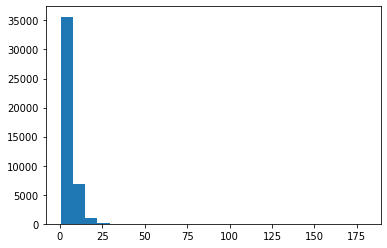

In [91]:
plt.hist(pop_df, bins=25)
plt.show()

In [94]:
# Plotting the number of films released between 1959 and 1970

# preparing the data
number_movies = df.filter("(release_year > 1959) and (release_year < 1971)").groupBy('release_year').count().toPandas()

In [95]:
# sorting the values:
number_movies = number_movies.sort_values(by=['release_year'], ascending=False)

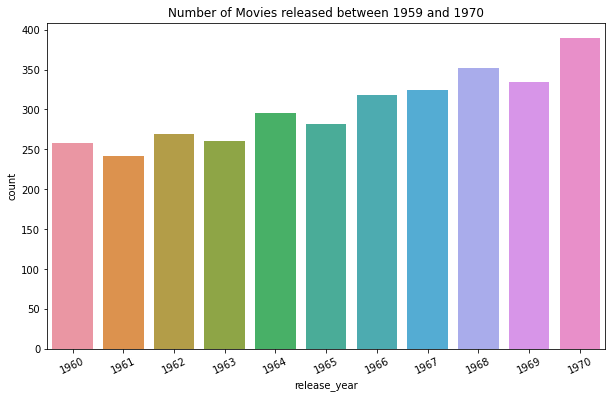

In [101]:
# Plotting the data using seaborn

plt.figure(figsize=(10,6))
sns.barplot(x='release_year', y='count', data=number_movies)
plt.xticks(rotation=25)
plt.title("Number of Movies released between 1959 and 1970")
plt.show();